In [243]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
# Import data files
df_survey = pd.read_csv("survey_results_public.csv")
df_scheme = pd.read_csv("survey_results_schema.csv")
df_africancountries = pd.read_csv("african_countries.csv")
df_africancountries_english = pd.read_csv("anglophone_african_countries.csv")

In [245]:
# African Countries
africancountries = df_africancountries['Country'].values.tolist()

In [246]:
#Introduce column to identify African and Non African records
df_survey['Continent'] = df_survey['Country'].apply(lambda x: "Africa" if x in africancountries else "Outside Africa")

<AxesSubplot:xlabel='Continent'>

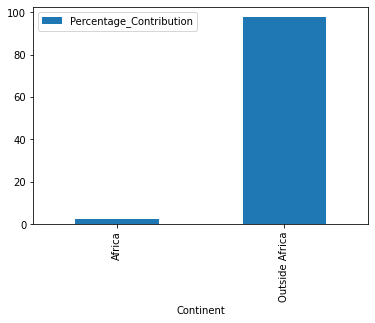

In [247]:
# number of respondents in the survey

total_respondents = df_survey['Respondent'].count()

df_survey_group = df_survey.groupby(['Continent'])['Respondent'].count().reset_index()

df_survey_group['Percentage_Contribution'] = 100 * (df_survey_group['Respondent']/total_respondents)

df_survey_group.plot.bar(x='Continent',y='Percentage_Contribution')

In [258]:
df_survey_group

,Continent,Respondent,Percentage_Contribution
0,Africa,1221,2.375856
1,Outside Africa,50171,97.624144


In [248]:
respondents_ratio = df_survey_group.loc[0,"Respondent"]/df_survey_group["Respondent"].sum()

#Question 1: % of total respondents who reported a country within Africa

print("Answer 01. Percentage of respondents who listed an African country is {:.1%} of total survey respondents".format(respondents_ratio) )

Answer 01. Percentage of respondents who listed an African country is 2.4% of total survey respondents


In [249]:
# Anglophone African Countries
africancountries_english = df_africancountries_english['Country'].values.tolist() 

In [250]:
#Extract records from survey dataset with country in Africa
df_survey_africa = df_survey[df_survey["Continent"] =="Africa"].reset_index(drop=True)

#Introduce a column to show official language - English or Non English
df_survey_africa['Language'] = df_survey_africa['Country'].apply(lambda x: "English" if x in africancountries_english else "Non English")

In [251]:
#Stats of respondents with country within Africa
df_survey_africa.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,1221.000000,927.000000,844.000000,521.000000,766.000000,153.000000,58.000000
mean,27835.002457,7.055016,6.477488,6.429942,8.421671,25844.723305,18646.451097
std,14489.316336,2.282953,2.492830,9.585616,1.487552,23096.577940,31284.785464
min,237.000000,0.000000,0.000000,0.000000,0.000000,6.354249,3.177125
25%,16043.000000,6.000000,5.000000,1.000000,8.000000,3779.000000,1113.585746
50%,28179.000000,7.000000,7.000000,3.000000,9.000000,24498.886414,3884.780995
75%,40058.000000,9.000000,8.000000,6.000000,10.000000,39396.346307,20000.000000
max,51281.000000,10.000000,10.000000,40.000000,10.000000,120000.000000,150000.000000


<AxesSubplot:xlabel='Country'>

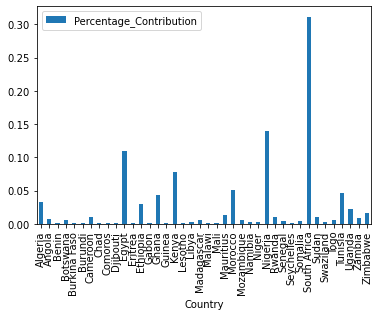

In [252]:
#Question 2: Distribution of African respondents - Respondents per African Country

df_survey_africa_country = df_survey_africa.groupby(['Country'])['Respondent'].count().reset_index()

df_survey_africa_country['Percentage_Contribution'] = (df_survey_africa_country['Respondent']/total_respondents_africa)

df_survey_africa_country.plot.bar(x='Country',y='Percentage_Contribution')

In [253]:
#Question 3: Determine Characteristics of  African countries with most respondents

Top4_by_contribution = df_survey_africa_country.nlargest(4, columns='Percentage_Contribution').Percentage_Contribution.sum()

Top4_countrynames = df_survey_africa_country.nlargest(4, columns='Percentage_Contribution')['Country'].to_list()

print("Answer 3: Within Africa, the top 4 countries - " + Top4_countrynames[0] + ", " + Top4_countrynames[1] +", " + Top4_countrynames[0] + ", " + Top4_countrynames[0] + " - with over {:.1%} of respondents are English speaking".format(Top4_by_contribution))

Answer 3: Within Africa, the top 4 countries - South Africa, Nigeria, South Africa, South Africa - with over 63.9% of respondents are English speaking


In [262]:
#Question 4: Given that top programming languages have English keywords/phrases, infer likely impact on respondent's career

#Fill Career Statisfaction with Mean
df_survey_africa['CareerSatisfaction'].fillna(value=df_survey_africa['CareerSatisfaction'].mean(), inplace=True)

# Calculate average career statisfaction based on language of respondent
df_survey_africa_lang = df_survey_africa.groupby(['Language'])['CareerSatisfaction'].mean().reset_index()
df_survey_africa_lang


,Language,CareerSatisfaction
0,English,7.179658
1,Non English,6.889777


<AxesSubplot:xlabel='Language'>

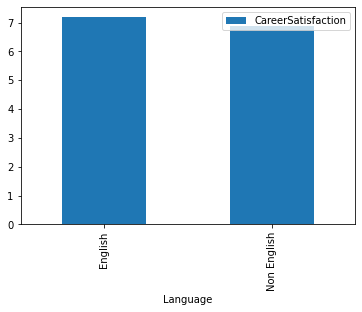

In [261]:
#df_survey_africa_lang
df_survey_africa_lang.plot.bar(x='Language',y='CareerSatisfaction')

In [259]:
print("Answer 4: Career satisfaction appears higher in responents from English-speaking countries compared to those from non-English speaking countries")

Answer 4: Career satisfaction appears higher in responents from English-speaking countries compared to those from non-English speaking countries
